## Classification

#### Classification is the process of classifying the objects from the input image using Classifier Network.

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torchvision
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [2]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()

        self.features = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5),
            nn.Tanh(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5),
            nn.Tanh(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        self.classifier = nn.Sequential(
            nn.Linear(16*4*4, 120),
            nn.Tanh(),

            nn.Linear(120, 84),
            nn.Tanh(),

            nn.Linear(84, 10),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.shape[0], -1)
        x = self.classifier(x)

        return x

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081)) 
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = LeNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

In [5]:
num_epochs = 5

Epoch [1/5], Batch [100/938], Loss: 0.0155
Epoch [1/5], Batch [200/938], Loss: 0.0115
Epoch [1/5], Batch [300/938], Loss: 0.0130
Epoch [1/5], Batch [400/938], Loss: 0.0167
Epoch [1/5], Batch [500/938], Loss: 0.0154
Epoch [1/5], Batch [600/938], Loss: 0.0125
Epoch [1/5], Batch [700/938], Loss: 0.0142
Epoch [1/5], Batch [800/938], Loss: 0.0216
Epoch [1/5], Batch [900/938], Loss: 0.0230
Accuracy after epoch 1: 98.55%



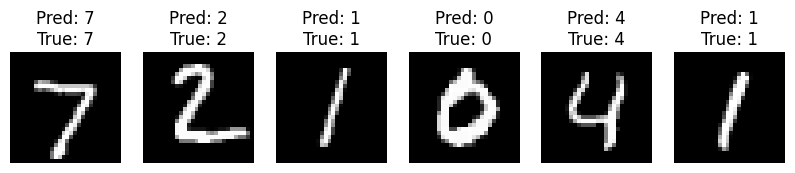

Epoch [2/5], Batch [100/938], Loss: 0.0178
Epoch [2/5], Batch [200/938], Loss: 0.0149
Epoch [2/5], Batch [300/938], Loss: 0.0090
Epoch [2/5], Batch [400/938], Loss: 0.0101
Epoch [2/5], Batch [500/938], Loss: 0.0143
Epoch [2/5], Batch [600/938], Loss: 0.0141
Epoch [2/5], Batch [700/938], Loss: 0.0166
Epoch [2/5], Batch [800/938], Loss: 0.0169
Epoch [2/5], Batch [900/938], Loss: 0.0156
Accuracy after epoch 2: 98.52%



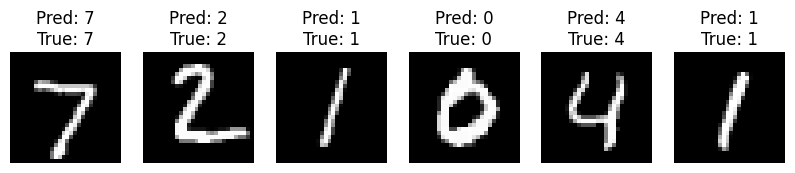

Epoch [3/5], Batch [100/938], Loss: 0.0123
Epoch [3/5], Batch [200/938], Loss: 0.0088
Epoch [3/5], Batch [300/938], Loss: 0.0101
Epoch [3/5], Batch [400/938], Loss: 0.0096
Epoch [3/5], Batch [500/938], Loss: 0.0124
Epoch [3/5], Batch [600/938], Loss: 0.0109
Epoch [3/5], Batch [700/938], Loss: 0.0111
Epoch [3/5], Batch [800/938], Loss: 0.0117
Epoch [3/5], Batch [900/938], Loss: 0.0155
Accuracy after epoch 3: 98.65%



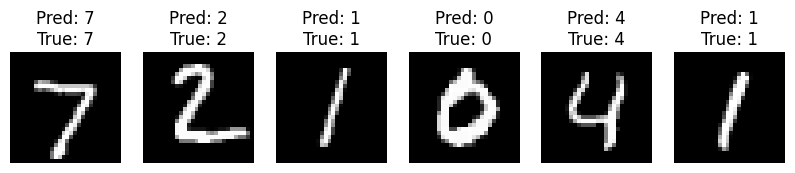

Epoch [4/5], Batch [100/938], Loss: 0.0096
Epoch [4/5], Batch [200/938], Loss: 0.0073
Epoch [4/5], Batch [300/938], Loss: 0.0084
Epoch [4/5], Batch [400/938], Loss: 0.0155
Epoch [4/5], Batch [500/938], Loss: 0.0099
Epoch [4/5], Batch [600/938], Loss: 0.0125
Epoch [4/5], Batch [700/938], Loss: 0.0120
Epoch [4/5], Batch [800/938], Loss: 0.0112
Epoch [4/5], Batch [900/938], Loss: 0.0160
Accuracy after epoch 4: 98.62%



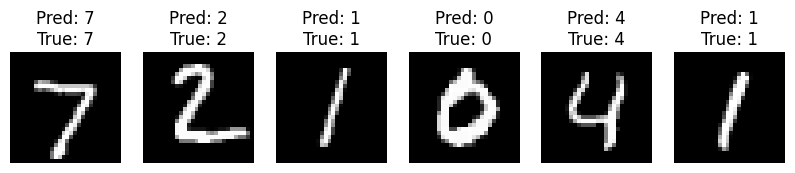

Epoch [5/5], Batch [100/938], Loss: 0.0078
Epoch [5/5], Batch [200/938], Loss: 0.0079
Epoch [5/5], Batch [300/938], Loss: 0.0042
Epoch [5/5], Batch [400/938], Loss: 0.0088
Epoch [5/5], Batch [500/938], Loss: 0.0077
Epoch [5/5], Batch [600/938], Loss: 0.0115
Epoch [5/5], Batch [700/938], Loss: 0.0179
Epoch [5/5], Batch [800/938], Loss: 0.0091
Epoch [5/5], Batch [900/938], Loss: 0.0118
Accuracy after epoch 5: 98.76%



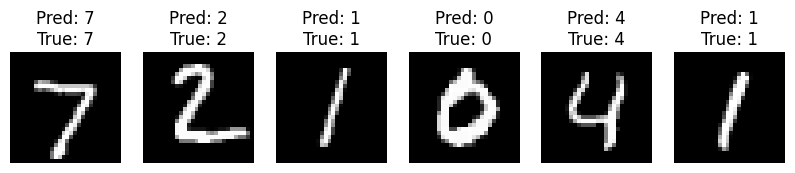

Training complete!


In [8]:
for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_loss = 0.0

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()
        output = model(data)

        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if batch_idx % 100 == 99:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Batch [{batch_idx + 1}/{len(train_loader)}], Loss: {running_loss / 100:.4f}')
            running_loss = 0.0

    # Evaluation phase
    model.eval()
    correct = 0
    total = 0
    sample_data, sample_predicted, sample_target = None, None, None  # to store one batch for visualization

    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(test_loader):
            data, target = data.to(device), target.to(device)
            output = model(data)
            predicted = output.argmax(dim=1)
            total += target.size(0)
            correct += (predicted == target).sum().item()

            # Save the first batch for visualization only
            if sample_data is None:
                sample_data = data
                sample_predicted = predicted
                sample_target = target

    accuracy = 100 * correct / total
    print(f'Accuracy after epoch {epoch + 1}: {accuracy:.2f}%\n')

    # Visualize the first 6 images from the saved sample batch
    fig = plt.figure(figsize=(10, 3))
    for i in range(6):
        plt.subplot(1, 6, i + 1)
        plt.axis('off')
        plt.imshow(sample_data[i].cpu().squeeze(), cmap='gray')
        plt.title(f'Pred: {sample_predicted[i].item()}\nTrue: {sample_target[i].item()}')
    plt.show()

print("Training complete!")